In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
#load data into a dataframe
df_app = pd.read_csv('C:\\Users\\WilsonYeung.AzureAD\OneDrive - JCW Resourcing\Documents\Simplilearn\googleplaystore.csv')
df_app.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#find out the number of nulls in the existing columns
df_app.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#dropping nulls value
df_app.dropna(axis=0,inplace=True)
#reset index after dropping the rows
df_app.reset_index(drop=True,inplace=True)

In [6]:
df_app['Size'].tail(15)

9345                  8.0M
9346                  3.6M
9347                  8.6M
9348    Varies with device
9349                   13M
9350                   13M
9351                  7.4M
9352                  2.3M
9353                  582k
9354                  619k
9355                  2.6M
9356                   53M
9357                  3.6M
9358    Varies with device
9359                   19M
Name: Size, dtype: object

In [7]:
#fix Size column by converting MB into KB and extracting numerical value
mb_indeces = df_app['Size'].loc[df_app['Size'].str.contains('M')].index.tolist()
converted = pd.DataFrame(df_app.loc[mb_indeces,'Size'].apply(lambda x: x.strip('M')).astype(float).apply(lambda x : x * 1000)).astype(str)
# pass converted values - now in KB - back into the respective indices
df_app.loc[mb_indeces,'Size'] = converted

In [8]:
df_app['Size'].tail(10)

9350               13000.0
9351                7400.0
9352                2300.0
9353                  582k
9354                  619k
9355                2600.0
9356               53000.0
9357                3600.0
9358    Varies with device
9359               19000.0
Name: Size, dtype: object

In [9]:
# Size cleansing
df_app['Size'] = df_app['Size'].apply(lambda x: x.strip('k'))
df_app[df_app['Size'] == 'Varies with device'] = 0
#now that everything is standardized, make it a float
df_app['Size'] = df_app['Size'].astype(float)

In [10]:
#overview of the types of the columns
df_app.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
df_app['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [12]:
#change data type of review scores to integers
df_app['Reviews'] = df_app['Reviews'].astype(int)

In [13]:
df_app['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [14]:
#remove '+' from numerical value
df_app['Installs'] = df_app['Installs'].astype(str).apply(lambda x: x.strip('\+'))
#remove ',' from numerical value
df_app['Installs'] = [int(i.replace(',','')) for i in df_app['Installs']]

In [15]:
#Installs column is now cleansed
df_app['Installs'].tail(15)

9345      100000
9346        5000
9347        1000
9348           0
9349        5000
9350       10000
9351       10000
9352      100000
9353      100000
9354        1000
9355         500
9356        5000
9357         100
9358           0
9359    10000000
Name: Installs, dtype: int64

In [16]:
#Remove ‘$’ sign, and convert to float type so it can hold decimal cases
df_app['Price'] = df_app['Price'].astype(str).apply(lambda x: x.strip('\$'))
df_app['Price'] = df_app['Price'].astype(float)

In [17]:
df_app[df_app['Reviews'] > df_app['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2340,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5535,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6144,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
6616,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7592,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
9260,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [18]:
df_app.drop(df_app[df_app['Reviews'] > df_app['Installs']].index,axis=0,inplace=True)

In [19]:
#there are now no such cases
np.sum(df_app['Reviews'] > df_app['Installs'])

0

In [20]:
free = df_app.loc[df_app['Type'] == 'Free'].index

In [21]:
# summing these conditions, and found that there are no such cases
np.sum(df_app.loc[free,'Price'] > 0)

0

<AxesSubplot:>

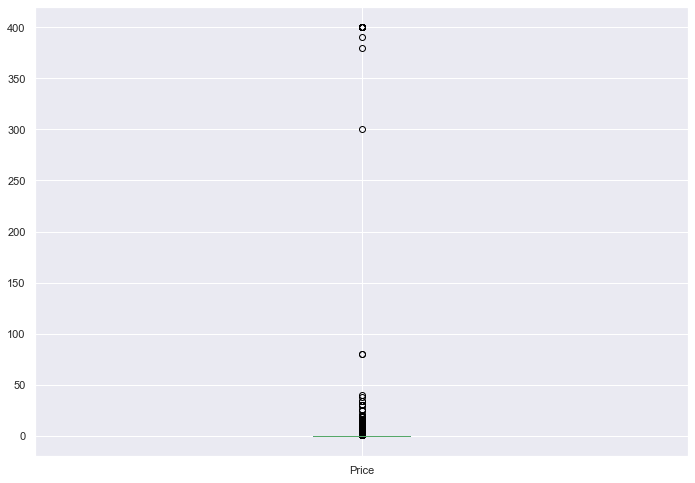

In [22]:
df_app.Price.plot.box()

In [24]:
df_app.Price.describe()


count    9354.000000
mean        0.931192
std        15.823346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

<AxesSubplot:>

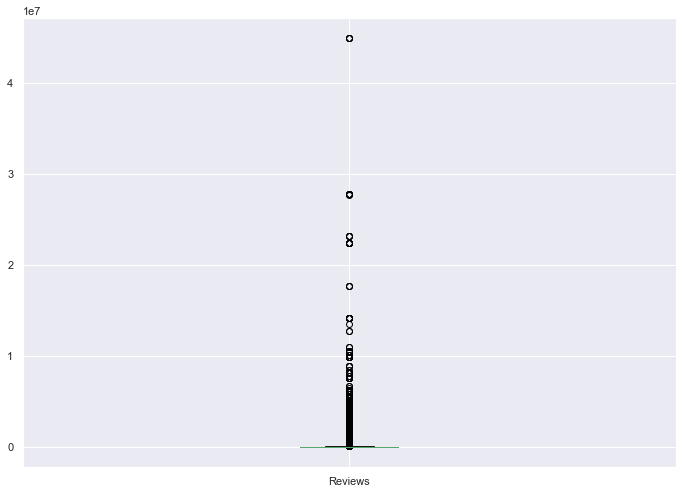

In [25]:
df_app.Reviews.plot.box()
#Majority of the apps have relatively low amount of reviews with very few having a high review count. 
#Statistics of Review column can be found below

In [26]:
df_app.Reviews.describe()

count    9.354000e+03
mean     2.434786e+05
std      1.697327e+06
min      0.000000e+00
25%      1.200000e+01
50%      6.285000e+02
75%      2.333575e+04
max      4.489389e+07
Name: Reviews, dtype: float64

<AxesSubplot:ylabel='Frequency'>

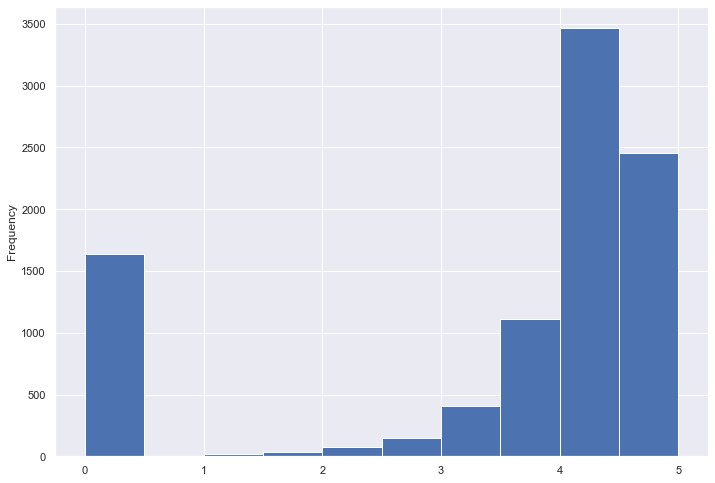

In [27]:
df_app.Rating.plot.hist()


<AxesSubplot:ylabel='Frequency'>

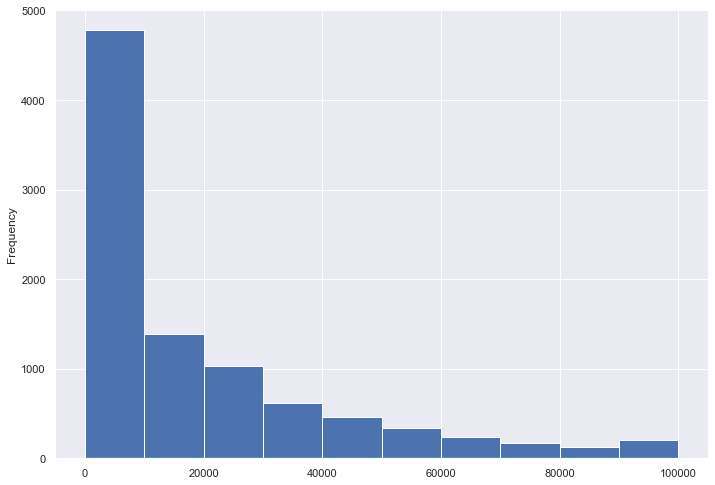

In [28]:
df_app.Size.plot.hist()

In [29]:
df_app.drop(df_app[df_app['Price'] >=200].index,inplace=True)

In [30]:
df_app.drop(df_app[df_app['Reviews'] > 2000000].index,inplace=True)

In [31]:
df_app[df_app.Installs < 10000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
9355,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up


In [32]:
#different percentile for Installs and keeping only those records above a threshold
df_app.Installs.quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.10           0.0
0.25        1000.0
0.50       50000.0
0.75     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [33]:
df_app = df_app[df_app.Installs <= 10000000.0].copy()

In [34]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


<AxesSubplot:xlabel='Rating', ylabel='Size'>

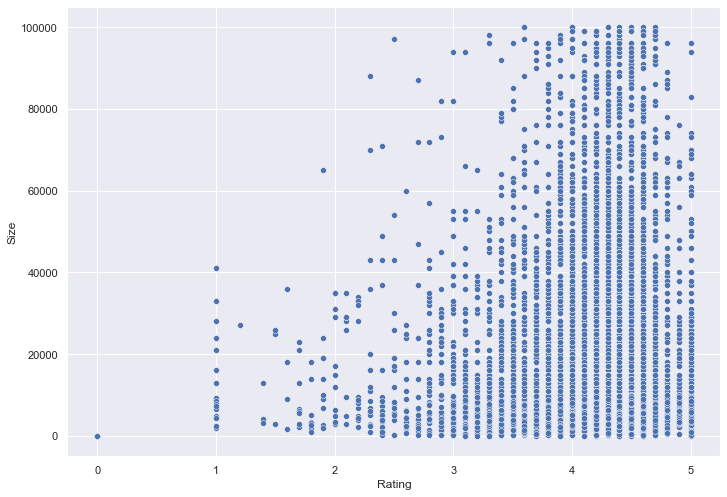

In [36]:
sns.scatterplot(x="Rating", y="Size", data=df_app)
#it is clear that heavy apps dont have a better rating. 
#there is a much more dense population of high rating apps with a low size than with larger size


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

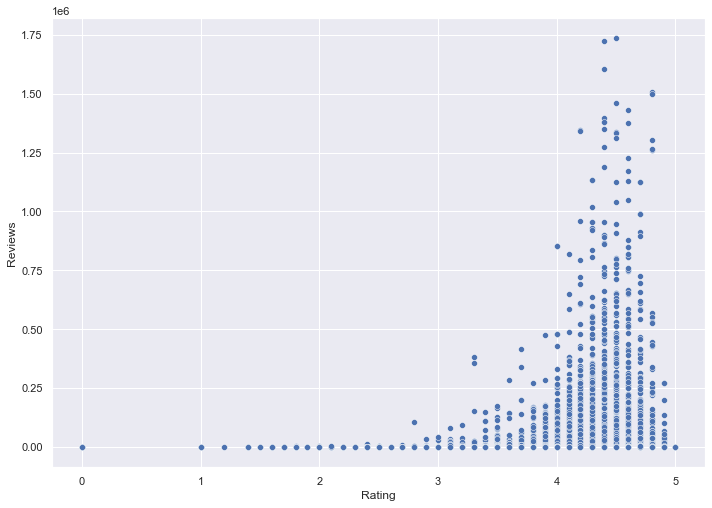

In [37]:
sns.scatterplot(x="Rating", y="Reviews", data=df_app)
#more number of reviews does not contribute to better rating. 
#Mid-range reviews have better ratings that high number of reviews.

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

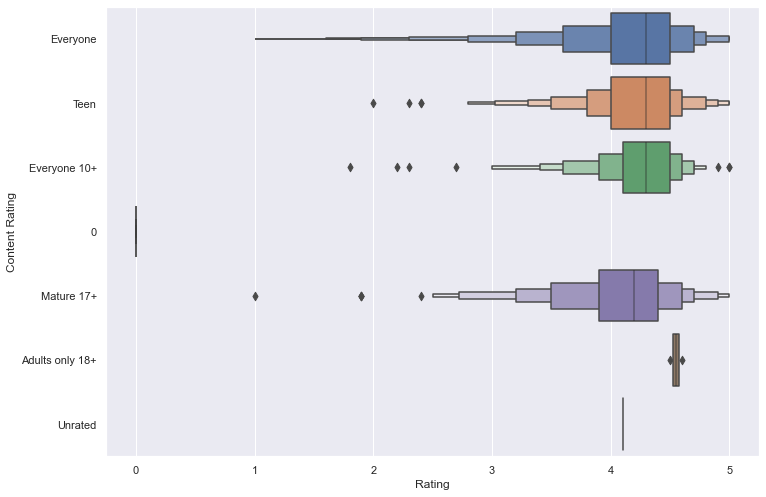

In [38]:
sns.boxenplot(x="Rating", y="Content Rating", data=df_app)
#its clear that Content rating for Teen are liked better

<AxesSubplot:xlabel='Rating', ylabel='Category'>

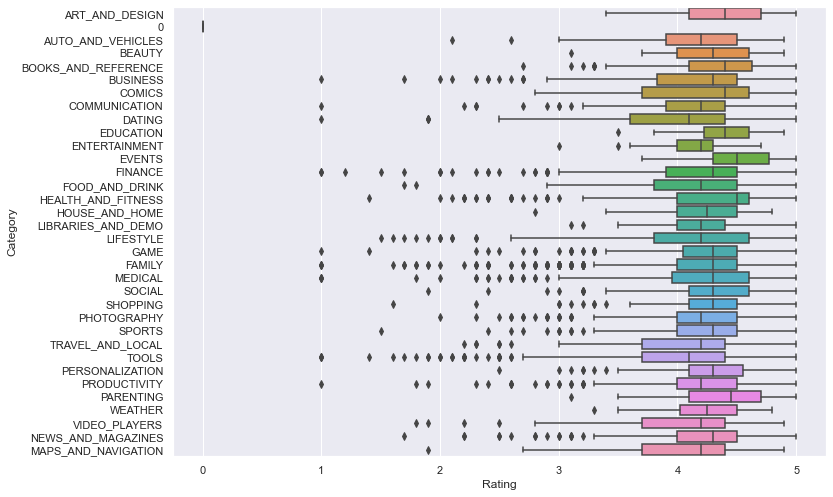

In [39]:
sns.boxplot(x='Rating',y='Category',data=df_app)
#Game category is most popular having the better share of ratings.

In [40]:
#create a copy of data frame
inp1 = df_app.copy()

In [41]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


In [42]:
inp1[['Installs','Reviews']]

,Installs,Reviews
0,10000,159
1,500000,967
2,5000000,87510
4,100000,967
5,50000,167
...,...,...
9355,500,7
9356,5000,38
9357,100,4
9358,0,0


In [43]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8944 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8944 non-null   object 
 1   Category        8944 non-null   object 
 2   Rating          8944 non-null   float64
 3   Reviews         8944 non-null   int32  
 4   Size            8944 non-null   float64
 5   Installs        8944 non-null   int64  
 6   Type            8944 non-null   object 
 7   Price           8944 non-null   float64
 8   Content Rating  8944 non-null   object 
 9   Genres          8944 non-null   object 
 10  Last Updated    8944 non-null   object 
 11  Current Ver     8944 non-null   object 
 12  Android Ver     8944 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.2+ MB


In [44]:
#drop unwanted cols
inp1.drop(columns = { 'App','Last Updated','Current Ver','Android Ver'},
inplace=True)

In [45]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design


In [46]:
dum_cols = ['Category','Genres','Content Rating']
inp2 = pd.get_dummies(inp1,columns=dum_cols,drop_first=True)
inp2

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000.0,10000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,2800.0,100000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167,5600.0,50000,Free,0.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,4.0,7,2600.0,500,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9356,4.5,38,53000.0,5000,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9357,5.0,4,3600.0,100,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9358,0.0,0,0.0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# type won't be needed for predicting the rating
inp2.pop('Type')

0       Free
1       Free
2       Free
4       Free
5       Free
        ... 
9355    Free
9356    Free
9357    Free
9358       0
9359    Free
Name: Type, Length: 8944, dtype: object

In [48]:
#Train test split and apply 70-30 split.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)
y_train = df_train.Rating
X_train = df_train
y_test = df_test.Rating
X_test = df_test
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
#Reporting r2 for the model
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

1.0

In [50]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

1.0